<h2>Econdb - The Database of Economic Indicators</h2>

Econdb https://www.econdb.com/ sisältää paljon talouteen liittyviä aikasarjoja. Sieltä voi hakea aikasarjan tickerin perusteella tai käyttämällä valmista Econdb:n antamaa Python komentoa.

Seuraavassa tarvitaan pandas-datareader -kirjastoa, joka ei kuulu Anacondan vakioasennukseen. Voit asentaa sen esimerkiksi seuraavasti:
<ul>
    <li>Käynnistä Anaconda Navigator ja valitse <b>Environments</b></li>
    <li>Jos <b>pandas-datareader</b> ei ole <b>Installed</b>-listassa, niin siirry <b>Not installed</b> -listaan</li>
    <li>Jos <b>pandas-datareader</b> ei löydy tästäkään listasta, niin päivitä lista (<b>Update index</b>)</li>
    <li>Valitse <b>pandas-datareader</b> ja napsauta alareunasta <b>Apply</b> ja seuraa asennuksen vaiheita.</li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
%matplotlib inline

<h3>Haku tickerin perusteella</h3>

In [2]:
# Suomen bruttokansantuotteen reaaliarvot
df1 = web.DataReader('ticker=RGDPFI', 'econdb')

# Ruotsin bruttokansantuotteen reaaliarvot
df2 = web.DataReader('ticker=RGDPSE', 'econdb')

# Yhdistetään datat ja muutetaan arvot muutosprosenteiksi
df3 = pd.concat([df1.pct_change(), df2.pct_change()], axis = 1)
df3.columns = ['Finland', 'Sweden']
df3

,Finland,Sweden
TIME_PERIOD,,
2016-01-01,NaN,NaN
2016-04-01,0.008573,-0.000149
2016-07-01,0.006214,0.002949
2016-10-01,0.003445,0.009188
2017-01-01,0.016253,0.004948
2017-04-01,0.004133,0.012298
2017-07-01,0.005351,0.009168
2017-10-01,0.012514,0.002922
2018-01-01,-0.001266,0.004413


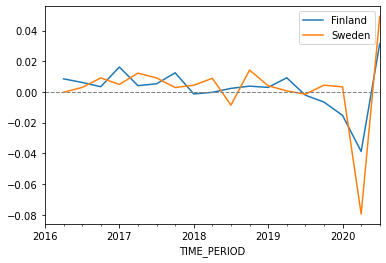

In [3]:
df3.plot()
plt.axhline(y=0, color = 'gray', linewidth = 1, linestyle = '--')

In [4]:
df3.corr()

,Finland,Sweden
Finland,1.000000,0.844373
Sweden,0.844373,1.000000


<h3>Haku Econdb:stä kopioidulla komennolla</h3>

In [5]:
# Seuraava koodi kopioitu Econdb:stä
df = web.DataReader('dataset=NAMQ_10_GDP&v=Geopolitical entity (reporting)&h=TIME&from=2017-08-01&to=2020-04-01&GEO=\
    [AL,AT,BE,BA,BG,HR,CY,CZ,DK,EE,EA19,FI,FR,DE,EL,HU,IS,IE,IT,XK,LV,LT,LU,MT,ME,NL,MK,NO,PL,PT,RO,RS,SK,SI,ES,SE,CH,TR,UK]\
    &NA_ITEM=[B1GQ]&S_ADJ=[SCA]&UNIT=[CLV10_MNAC]', 'econdb')
df

Frequency                                                                                 Quarterly  \
Unit of measure                     Chain linked volumes (2010), million units of national currency   
Seasonal adjustment                                           Seasonally and calendar adjusted data   
National accounts indicator (ESA10)                         Gross domestic product at market prices   
Geopolitical entity (reporting)                                                             Austria   
TIME_PERIOD                                                                                           
2016-01-01                                                                     79216.0                
2016-04-01                                                                     79133.0                
2016-07-01                                                                     79558.0                
2016-10-01                                                                     80418.0                
2017-01-01                                                                     80983.0                
2017-04-01                                                                     81419.0                
2017-07-01                                                                     81752.0                
2017-10-01                                                                     82123.0                
2018-01-01                                                                     83077.0                
2018-04-01                                                                     83441.0                
2018-07-01                                                                     83630.0                
2018-10-01                                                                     84341.0                
2019-01-01                                                                     85016.0                
2019-04-01                                                                     84746.0                
2019-07-01                                                                     85008.0                
2019-10-01                                                                     84552.0                
2020-01-01                                                                     82212.0                
2020-04-01                                                                     72702.0                
2020-07-01                                                                     81401.0                

Frequency                                                                \
Unit of measure                                                           
Seasonal adjustment                                                       
National accounts indicator (ESA10)                                       
Geopolitical entity (reporting)       Belgium Bulgaria  Croatia  Cyprus   
TIME_PERIOD                                                               
2016-01-01                            97459.0  20760.0  83552.0  4666.0   
2016-04-01                            97994.0  20957.0  83958.0  4696.0   
2016-07-01                            98166.0  21096.0  84447.0  4754.0   
2016-10-01                            98670.0  21337.0  85538.0  4848.0   
2017-01-01                            99302.0  21508.0  86311.0  4891.0   
2017-04-01                            99538.0  21691.0  86622.0  4942.0   
2017-07-01                            99485.0  21870.0  87848.0  5022.0   
2017-10-01                           100272.0  22026.0  88276.0  5087.0   
2018-01-01                           100705.0  22155.0  87966.0  5167.0   
2018-04-01                           101184.0  22362.0  90026.0  5235.0   
2018-07-01                           101530.0  22596.0  90182.0  5276.0   
2018-10-01                           102403.0  22792.0  90641.0  5309.0   
2019-01-01                           102566.0  23078.0  91456.0  5357.0   

In [6]:
# Näytetään kaikki sarakkeet
pd.set_option('max_columns', None)
# Sarakkeiden monitasoisen hierarkisen indeksin voi poistaa:
df.columns = df.columns.droplevel([0, 1, 2, 3])
df

Geopolitical entity (reporting),Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Estonia,Finland,France,Germany,Hungary,Ireland,Italy,Latvia,Lithuania,Luxembourg,Malta,Netherlands,Norway,Euro area (19 countries),Poland,Greece,Portugal,Romania,Serbia,Slovenia,Spain,Sweden,Switzerland
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,79216.0,97459.0,20760.0,83552.0,4666.0,1103140.0,490360.0,4476.0,48041.0,529901,707554.0,7647013.0,56829.0,392570.0,5496.0,8547.0,11799.0,2266.0,167799.0,712707.0,2508764.0,424068.0,43778.0,43463.0,156192.0,869249.0,9417.0,273548.0,1009461.0,174295.0
2016-04-01,79133.0,97994.0,20957.0,83958.0,4696.0,1107243.0,496993.0,4472.0,48453.0,528711,710342.0,7754406.0,57825.0,393399.0,5459.0,8584.0,12062.0,2282.0,168190.0,707987.0,2515145.0,429632.0,43597.0,43593.0,158062.0,874145.0,9530.0,274695.0,1009310.0,175096.0
2016-07-01,79558.0,98166.0,21096.0,84447.0,4754.0,1115336.0,501210.0,4522.0,48754.0,529945,712085.0,7790975.0,57551.0,395488.0,5471.0,8690.0,12190.0,2328.0,170078.0,701883.0,2526350.0,430728.0,43840.0,44105.0,158481.0,880493.0,9617.0,277132.0,1012286.0,176103.0
2016-10-01,80418.0,98670.0,21337.0,85538.0,4848.0,1125007.0,504821.0,4576.0,48922.0,532931,714803.0,7858060.0,64246.0,396613.0,5537.0,8791.0,12352.0,2355.0,171511.0,718518.0,2545827.0,440480.0,44016.0,44516.0,161729.0,881958.0,9693.0,278419.0,1021588.0,176713.0
2017-01-01,80983.0,99302.0,21508.0,86311.0,4891.0,1143724.0,508124.0,4661.0,49717.0,537209,723586.0,7972274.0,61851.0,398764.0,5608.0,8889.0,12152.0,2462.0,172382.0,723392.0,2564522.0,444753.0,43958.0,45037.0,166152.0,883593.0,9858.0,280629.0,1026642.0,177035.0
2017-04-01,81419.0,99538.0,21691.0,86622.0,4942.0,1174547.0,513804.0,4737.0,49923.0,541216,728325.0,8069732.0,62657.0,400384.0,5656.0,8985.0,12191.0,2465.0,173901.0,728784.0,2582200.0,448681.0,44336.0,45265.0,168330.0,890492.0,9992.0,283642.0,1039268.0,177515.0
2017-07-01,81752.0,99485.0,21870.0,87848.0,5022.0,1180542.0,511920.0,4757.0,50190.0,545008,734738.0,8138679.0,65686.0,401994.0,5688.0,9083.0,12406.0,2518.0,175166.0,734118.0,2602022.0,453731.0,44654.0,45579.0,172188.0,900286.0,10072.0,285280.0,1048797.0,178676.0
2017-10-01,82123.0,100272.0,22026.0,88276.0,5087.0,1190409.0,515784.0,4831.0,50818.0,549500,740872.0,8253253.0,68578.0,404231.0,5718.0,9168.0,12528.0,2521.0,176554.0,732586.0,2624078.0,461464.0,44550.0,45955.0,173096.0,904949.0,10287.0,287064.0,1051861.0,180584.0
2018-01-01,83077.0,100705.0,22155.0,87966.0,5167.0,1198358.0,518867.0,4876.0,50754.0,550202,739338.0,8404434.0,69379.0,404290.0,5775.0,9241.0,12729.0,2529.0,177361.0,735916.0,2629238.0,467566.0,44839.0,46296.0,173864.0,925872.0,10309.0,288642.0,1056503.0,182600.0


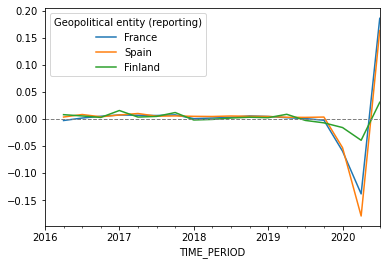

In [7]:
df[['France', 'Spain', 'Finland']].pct_change().plot()
plt.axhline(y=0, color = 'gray', linewidth = 1, linestyle = '--')